In [88]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets'
os.chdir(proj_dir)

Mounted at /content/drive


In [101]:
trait = "Depression"
condition = 'Addiction Susceptibility'

# 1. Gene Data Preparation

In [90]:
!pip install sparse_lmm

In [91]:
geo_root = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets/GEO'

##Gene Data for Condition

In [92]:
import gzip
import pandas as pd
import os
import io

# Process the clinical data to get the mapping between gene names and gene probes.
condition_clinical_data_path = os.path.join(geo_root, '85_Gene_DRD_Trait_AddictionSusceptibility/GSE71939/GSE71939_family.soft.gz')

with gzip.open(condition_clinical_data_path, 'rt') as f:
    contents = f.read()
# Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
condition_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
# map_data['Gene Symbol']  # Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
# map_data['ID']  # Gene probes that exit both in gene data and map data
condition_map_data = condition_map_data.loc[:,['ID','Gene Symbol']]
condition_map_data = condition_map_data.dropna()
condition_map_data


Map data:


,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
54630,AFFX-HUMGAPDH/M33197_M_at,GAPDH
54631,AFFX-HUMISGF3A/M97935_3_at,STAT1
54632,AFFX-HUMISGF3A/M97935_5_at,STAT1
54633,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [93]:
condition_gene_data_path = os.path.join(geo_root, '85_Gene_DRD_Trait_AddictionSusceptibility/GSE71939/GSE71939_series_matrix.txt.gz')
condition_gene_data = pd.read_csv(condition_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("Gene Data:")
condition_gene_data = condition_gene_data.dropna()
condition_gene_data

Gene Data:


,ID_REF,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
0,1007_s_at,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
1,1053_at,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
2,117_at,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
3,121_at,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
4,1255_g_at,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,3.515940,3.539705,3.584984,3.596067,3.545027,3.440291,3.752364,3.556127,3.589279,4.144625,4.043753,4.026245,4.142930,4.053573,4.124235,4.009781,4.088837,3.941025
54671,AFFX-ThrX-M_at,3.138104,3.219658,3.195710,3.306068,3.263290,3.198293,3.219658,3.219658,3.219658,3.410841,3.542287,3.602475,3.519912,3.402759,3.521458,3.617942,3.521458,3.521458
54672,AFFX-TrpnX-3_at,2.888776,2.943802,2.963034,3.027507,3.020854,3.027979,2.983401,2.882772,2.945647,3.221371,3.172050,3.242887,3.238628,3.309539,3.189017,3.226519,3.223271,3.306297
54673,AFFX-TrpnX-5_at,3.222764,3.248620,3.451505,3.463452,3.263041,3.230397,3.367256,3.256350,3.277619,3.700380,3.626289,3.569136,3.571794,3.657908,3.744095,3.768802,3.657908,3.635227


In [94]:
# Merge two datasets
condition_gene_data = pd.merge(condition_map_data.rename(columns={'ID':'ID_REF'}), condition_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
condition_gene_data.rename(str.lower, axis='index', inplace=True)
condition_gene_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Gene Symbol,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
rfc2,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
hspa6,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
pax8,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
guca1a,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.285210,13.181778,13.174343,13.311560,13.241798,13.246569,13.221085,13.184927,13.215046,13.374165,13.402090,13.329721,13.416237,13.430297,13.349765,13.367505,13.433381,13.352209
stat1,9.578593,9.149700,9.013328,9.186798,9.053712,8.966410,9.365567,8.978912,8.947200,9.551512,9.547468,9.196738,9.513483,9.441670,9.265777,9.473402,9.538221,9.243079
stat1,4.103462,3.867484,3.751517,4.012691,3.932820,3.855030,4.151565,4.022652,4.155426,4.654129,4.702240,4.519354,4.754346,4.713375,4.512929,4.857638,4.743431,4.673550


##Gene Data for Trait

In [95]:
trait_clinical_data_path = os.path.join(geo_root, '83_Gene_BDNF_Trait_Depression/GSE38311/GSE38311_family.soft.gz')

with gzip.open(trait_clinical_data_path, 'rt') as f:
    contents = f.read()
#Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
trait_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
#map_data_trait['GENE_SYMBOL']#Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
#map_data_trait['ID']#Gene probes that exit both in gene data and map data
trait_map_data = trait_map_data.loc[:,['ID','Gene Symbol']]
trait_map_data = trait_map_data.dropna()
trait_map_data

Map data:


,ID,Gene Symbol
0,1415670_at,Copg1
1,1415671_at,Atp6v0d1
2,1415672_at,Golga7
3,1415673_at,Psph
4,1415674_a_at,Trappc4
...,...,...
22658,AFFX-PyruCarbMur/L09192_MA_at,Pcx
22659,AFFX-PyruCarbMur/L09192_MB_at,Pcx
22684,AFFX-TransRecMur/X57349_3_at,Tfrc
22685,AFFX-TransRecMur/X57349_5_at,Tfrc


In [96]:
trait_gene_data_path = os.path.join(geo_root, '83_Gene_BDNF_Trait_Depression/GSE38311/GSE38311_series_matrix.txt.gz')

trait_gene_data = pd.read_csv(trait_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("\nGene Data:")
trait_gene_data = trait_gene_data.dropna()
trait_gene_data


Gene Data:


,ID_REF,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
0,1415670_at,418.5,317.8,679.0,622.3,626.8
1,1415671_at,335.6,446.4,616.6,806.0,680.8
2,1415672_at,382.8,221.4,362.5,311.4,460.6
3,1415673_at,66.7,40.4,52.2,49.1,66.9
4,1415674_a_at,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...,...
22685,AFFX-TransRecMur/X57349_5_at,81.4,62.5,62.4,110.9,88.1
22686,AFFX-TransRecMur/X57349_M_at,10.6,9.7,24.8,54.2,50.3
22687,AFFX-TrpnX-3_at,4.1,0.3,0.7,1.9,0.8
22688,AFFX-TrpnX-5_at,3.6,4.1,6.4,4.0,4.1


In [97]:
trait_gene_data = pd.merge(trait_map_data.rename(columns={'ID':'ID_REF'}), trait_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
trait_gene_data.rename(str.lower, axis='index', inplace=True)
trait_gene_data

,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Gene Symbol,,,,,
copg1,418.5,317.8,679.0,622.3,626.8
atp6v0d1,335.6,446.4,616.6,806.0,680.8
golga7,382.8,221.4,362.5,311.4,460.6
psph,66.7,40.4,52.2,49.1,66.9
trappc4,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...
pcx,2.9,17.9,2.1,12.4,8.0
pcx,5.6,2.7,1.0,2.5,3.3
tfrc,22.0,29.3,30.5,53.8,49.7


##Confirmation of Data Suitability

In [98]:
genes_in_trait_data = trait_gene_data.index.tolist()
genes_in_condition_data = condition_gene_data.index.tolist()
def find_common_genes(list1, list2):
    common_elements = []
    for element1 in list1:
        if element1 in list2:
            common_elements.append(element1)
    return common_elements

common_genes = find_common_genes(genes_in_trait_data, genes_in_condition_data)
if len(common_genes):
    print(f"Both gene data have {len(common_genes)} identical genes:", common_genes)
else:
    print("No the same genes. Please find the other gene data for condition or trait!")

Both gene data have 18481 identical genes: ['copg1', 'atp6v0d1', 'golga7', 'psph', 'dpm2', 'psmb5', 'dhrs1', 'ppm1a', 'psenen', 'mrpl43', 'xpo7', 'nmt1', 'atg5', 'mtif2', 'rab14', 'psap', 'ube2g1', 'zkscan3', 'mrpl27', 'dlg1', 'canx', 'derl1', 'wars', 'psma1', 'sar1a', 'g3bp2', 'golm1', 'gps1', 'ssr3', 'ctbp1', 'huwe1', 'cdv3', 'smim7', 'copa', 'anapc2', 'tug1', 'gbf1', 'cox18', 'arfgef1', 'zranb1', 'ddx24', 'snrnp27', 'tmem129', 'rnf220', 'sap30l', 'armc1', 'mad2l1bp', 'naa60', 'vta1', 'eif5', 'cdc42', 'rrn3', 'ankrd17', 'apoa1bp', 'pabpn1', 'pdpk1', 'cpsf7', 'angel2', 'abhd16a', 'ddb1', 'pfdn5', 'rfk', 'txndc12', 'rbm42', 'psmc5', 'tmem165', 'aup1', 'hdac5', 'dscr3', 'cic', 'riok3', 'dctn5', 'rragc', 'tbl3', 'hp1bp3', 'abhd17a', 'polr2f', 'snapin', 'gbf1', 'fryl', 'lamtor5', 'atox1', 'mrpl52', 'mrpl52', 'tmem234', 'hnrnpul2', 'sec22b', 'ythdf1', 'ube2r2', 'itch', 'wdr6', 'ncl', 'ncl', 'ncl', 'elp2', 'rbbp7', 'aldh3a2', 'pnliprp1', 'morf4l2', 'armcx2', 'vps35', 'vps35', 'cct8', 'pgc',

In [99]:
corresponding_gene_symbol_path = os.path.join(os.path.dirname(geo_root), 'Summary_Corresponding_Gene_Symbol.csv')
corresponding_gene = pd.read_csv(corresponding_gene_symbol_path)
corresponding_gene = corresponding_gene.loc[:,['Trait name','Corresponding_Gene_Symbol']].set_index('Trait name')
# Convert to lower case
corresponding_gene = corresponding_gene.apply(lambda x: x.astype(str).str.lower())
corresponding_gene.index = corresponding_gene.index.str.lower()
corresponding_gene

,Corresponding_Gene_Symbol
Trait name,
breast cancer,"brca2, cdh1, ppm1d, pik3ca, kras, akt1, tp53, ..."
cystic fibrosis,"cftr, fcgr2a, tgfb1, kif21a, cdc73, crb2, rnaset2"
obesity,"lep, pparg, pomc, mc4r, enpp1, adcy3"
sickle cell anemia,"hbb, trnt1, gata1, fancb, fanca, fancf, fancc,..."
huntington's disease,"prnp, jph3, htt, gba1, mpz, psen1, apoe, gdap1..."
...,...
metabolic rate,"adrb1, mmp1, rnf212, dyrk1b, cela2a, slc25a42,..."
von willebrand disease,"vwf, gp1ba, vwa5a, vwa7, vwce, vwc2, svep1, vw..."
werner syndrome,"wrn, wrnip1, fgfr2, fbn1, mecp2, flna, tp63, t..."


### The Feasibility  of The First Stage Regression Analysis

In [102]:
corresponding_gene_for_trait = corresponding_gene.loc[trait.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_trait = [gn.strip() for gn in corresponding_gene_for_trait]
print("Corresponding genes for trait", corresponding_gene_for_trait)
corresponding_gene_for_condition = corresponding_gene.loc[condition.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_condition = [gn.strip() for gn in corresponding_gene_for_condition]
print("Corresponding genes for condition", corresponding_gene_for_condition)

gene_regressors_for_condition = find_common_genes(corresponding_gene_for_condition, common_genes)
if len(gene_regressors_for_condition):
    print(f"The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. \n There are(is) {len(gene_regressors_for_condition)} regressors:", gene_regressors_for_condition)
else:
    print("No the same gene regressors. Please find the other gene data for condition or trait!")
    # break


Corresponding genes for trait ['tph2']
Corresponding genes for condition ['faah', 'chrna4', 'cyp2a6', 'hla-b', 'htr2a', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']
The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. 
 There are(is) 7 regressors: ['faah', 'chrna4', 'tnf', 'nos3', 'mthfr', 'aldh2', 'ifngr1']


##Clinical Data for Trait

In [103]:
def extract_lines_with_prefix(file_path, prefixes):
    filtered_lines = []
    with gzip.open(file_path, 'rt') as f:
      contents = f.read()
    lines = contents.split('\n')
    for line in lines:
      line = line.strip()
      for prefix in prefixes:
        if line.startswith(prefix):
          filtered_lines.append(line)
          break
    return filtered_lines
trait_file_path = trait_gene_data_path # gene_data_path_trait
trait_prefixes = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefixes)
trait_filtered_content = '\n'.join(trait_filtered_lines)
print(trait_filtered_content + "\n")

!Series_title	"Expression of ventromedial hypothalamus (VMH) from electroconvulsive seizure (ECS) treated C57Bl/6 mice"
!Series_summary	"The ventromedial nucleus of the hypothalamus (VMH) is thought to a satiety center and a potential target for anti-obesity therapy. Electroconvulsive seizure (ECS) therapy is highly effective in psychiatric diseases including depression, but also implicated beneficial effects on other neurological diseases. Although it has been reported that the neurons in the VMH are strongly activated by ECS stimulation, the effect of ECS in this hypothalamic subnucleus remains unknown. To address this issue, we investigated molecular changes in the VMH in response to ECS by utilizing a method of laser-capture microdissection coupled with microarray analysis, and examined behavioral effects of ECS via VMH activation. ECS significantly induced gene expression not only immediate-early genes such as Fos, Fosb and Jun, but also Bdnf, Adcyap1, and Hrh1 in the VMH after a 

###Manual Labeling

In [104]:
trait_prefix = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefix)
trait_filtered_content = '\n'.join(trait_filtered_lines)
trait_clinical_data = pd.read_csv(io.StringIO(trait_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
trait_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
0,!Sample_characteristics_ch1,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6,strain: C57Bl/6
1,!Sample_characteristics_ch1,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus,tissue: hypothalamus
2,!Sample_characteristics_ch1,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [105]:
trait_clinical_data = trait_clinical_data.drop(trait_clinical_data.index[[0, 1]])  # Remove the unrelated first and second rows
trait_clinical_data = trait_clinical_data.drop(columns=[trait_clinical_data.columns[0]])  # Remove the unrelated first column
trait_clinical_data.index = [trait]
trait_clinical_data


,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Depression,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [106]:
trait_clinical_data = trait_clinical_data.replace("group: animal without seizure", 0)
trait_clinical_data = trait_clinical_data.replace("group: animal with seizure", 1)
control_group_samples_id = trait_clinical_data.columns[trait_clinical_data.eq('group: Control').any()]
trait_clinical_data = trait_clinical_data.drop(columns=control_group_samples_id)
trait_clinical_data

,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Depression,"treatment: no shock, brain collected after 2hrs",treatment: 1 shock and brain collected after 2hrs,treatment: 1 shock and brain collected after 6hrs,treatment: 7 shocks and brain collected after ...,treatment: 7 shocks and brain collected after ...


In [107]:
trait_gene_data = trait_gene_data.drop(columns=control_group_samples_id)
trait_gene_data

,GSM938860,GSM938861,GSM938862,GSM938863,GSM938864
Gene Symbol,,,,,
copg1,418.5,317.8,679.0,622.3,626.8
atp6v0d1,335.6,446.4,616.6,806.0,680.8
golga7,382.8,221.4,362.5,311.4,460.6
psph,66.7,40.4,52.2,49.1,66.9
trappc4,188.3,159.3,226.9,148.4,216.1
...,...,...,...,...,...
pcx,2.9,17.9,2.1,12.4,8.0
pcx,5.6,2.7,1.0,2.5,3.3
tfrc,22.0,29.3,30.5,53.8,49.7


In [108]:
trait_merged_data = pd.concat([trait_gene_data, trait_clinical_data]).T
# merged_data_trait
# Check whether column names are duplicated
duplicated_columns = trait_merged_data.columns[trait_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)
# Delete duplicate column names and save only one of the columns
trait_merged_data = trait_merged_data.loc[:, ~trait_merged_data.columns.duplicated()]
trait_merged_data

Duplicate column names: Index(['gbf1', 'mrpl52', 'ncl', 'ncl', 'loc101056240 /// sumo2', 'vps35',
       'ublcp1', 'ublcp1', 'spin1', 'ddr1',
       ...
       'actb', 'gapdh', 'gapdh', 'pcx', 'pcx', 'pcx', 'pcx', 'tfrc', 'tfrc',
       'tfrc'],
      dtype='object', length=8529)


,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,psenen,...,adss,ercc2,acrbp /// ing4,eif2b1,ppl,bod1l,zmiz2,alg3,gapdh,Depression
GSM938860,418.5,335.6,382.8,66.7,188.3,92.7,85.5,113.2,196.7,126.7,...,75.5,10.3,37.3,39.7,3.5,1.4,34.7,16.6,3332.5,"treatment: no shock, brain collected after 2hrs"
GSM938861,317.8,446.4,221.4,40.4,159.3,87.5,90.7,81.4,240.3,289.1,...,75.5,7.7,15.3,62.3,2.6,0.9,56.1,17.5,3066.6,treatment: 1 shock and brain collected after 2hrs
GSM938862,679.0,616.6,362.5,52.2,226.9,111.0,226.8,205.6,436.8,265.7,...,92.9,16.9,23.3,30.3,9.0,6.2,93.6,8.0,4645.4,treatment: 1 shock and brain collected after 6hrs
GSM938863,622.3,806.0,311.4,49.1,148.4,157.2,150.7,203.1,281.4,230.9,...,104.3,19.7,21.6,106.0,16.2,13.6,49.9,20.8,4554.1,treatment: 7 shocks and brain collected after ...
GSM938864,626.8,680.8,460.6,66.9,216.1,100.9,237.9,87.9,488.5,332.2,...,175.3,13.9,22.4,44.5,0.9,3.4,48.8,32.4,4454.0,treatment: 7 shocks and brain collected after ...


##Clinical Data for Condition

###Manual Labeling

In [109]:
#Read clinical information. Note that clear undersanding on these information is necessary.
condition_file_path = condition_gene_data_path
prefixes_condition = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, prefixes_condition)
condition_filtered_content = '\n'.join(condition_filtered_lines)
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
print(condition_filtered_content + "\n")

!Series_title	"Expression data of SHSY5Y cells after cocaine exposure"
!Series_summary	"The aim of the study was to evaluate cocaine-induced changes in gene expression in a dopaminergic model."
!Series_summary	"Cocaine reward and reinforcing effects are mediated mainly by dopaminergic neurotransmission. In this study we aimed at evaluating gene expression changes induced by acute cocaine exposure on SH-SY5Y differentiated cells, which have been widely used as a dopaminergic neuronal model. Expression changes and a concomitant increase in neuronal activity were observed 6 hours after a 5 uM cocaine exposure, whereas no changes in gene expression nor in neuronal activity took place at 1 uM cocaine. A total of 756 differentially expressed genes, mainly related to regulation of transcription and gene expression, cell cycle, adhesion and cell projection, as well as MAPK, CREB, neurotrophin and neuregulin signaling pathways. Genes displaying altered expression were subsequently targeted with

In [110]:
#This is an example of manual labeling
condition_prefixes = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, condition_prefixes)
condition_filtered_content = '\n'.join(condition_filtered_lines)
condition_clinical_data = pd.read_csv(io.StringIO(condition_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
condition_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
0,!Sample_characteristics_ch1,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA,cell line: SH-SY5Y differentiated with RA
1,!Sample_characteristics_ch1,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [111]:
condition_clinical_data = condition_clinical_data.drop(condition_clinical_data.index[[0]])  # Remove the unrelated first and second rows
condition_clinical_data = condition_clinical_data.drop(columns=[condition_clinical_data.columns[0]])  # Remove the unrelated first column
condition_clinical_data.index = [condition]
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.
#Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
condition_clinical_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Addiction Susceptibility,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [112]:
condition_clinical_data = condition_clinical_data.replace("bmi: 25-29.99", 1)
condition_clinical_data = condition_clinical_data.replace("bmi: 30+", 1)
condition_clinical_data = condition_clinical_data.replace("bmi: <25", 0)
condition_clinical_data = condition_clinical_data.replace("bmi: Unk", "NaN")
condition_clinical_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Addiction Susceptibility,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [113]:
NaN_Samples_id = condition_clinical_data.columns[condition_clinical_data.eq('NaN').any()]
print(NaN_Samples_id)
condition_clinical_data = condition_clinical_data.drop(columns=NaN_Samples_id)
condition_clinical_data

Index([], dtype='object')


,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Addiction Susceptibility,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 6 hours after a 30-min exposure to ...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...,treatment: 24 hours after a 30-min exposure to...


In [114]:
condition_gene_data = condition_gene_data.drop(columns=NaN_Samples_id)
condition_gene_data

,GSM1847671,GSM1847672,GSM1847673,GSM1847674,GSM1847675,GSM1847676,GSM1847677,GSM1847678,GSM1847679,GSM1847680,GSM1847681,GSM1847682,GSM1847683,GSM1847684,GSM1847685,GSM1847686,GSM1847687,GSM1847688
Gene Symbol,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,9.301571,9.318660,9.242146,9.331954,9.359714,9.306307,9.229553,9.414227,9.304896,9.385627,9.399579,9.309361,9.271944,9.389316,9.312436,9.348287,9.499086,9.237666
rfc2,9.355880,9.318865,9.302872,9.498672,9.511966,9.512039,9.354713,9.461574,9.447276,9.784995,9.563584,9.517188,9.685901,9.654523,9.795130,9.564588,9.580905,9.706561
hspa6,3.859333,3.680735,3.750826,3.644128,3.677574,3.680365,3.632442,3.697364,3.740293,4.139292,4.162635,4.306695,3.982849,3.954774,4.139789,4.112617,4.219669,4.025446
pax8,6.970233,6.958087,6.927173,6.940049,6.945966,7.024712,6.886061,6.873566,6.812068,7.316451,7.242142,7.400409,7.173855,6.975248,7.279250,7.265088,7.161061,7.239671
guca1a,8.209672,7.915630,7.548595,8.312109,7.950794,7.756521,8.292259,7.939931,7.727716,8.535836,8.194052,8.004440,8.452651,8.126698,7.847798,8.173233,8.102555,7.768960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.285210,13.181778,13.174343,13.311560,13.241798,13.246569,13.221085,13.184927,13.215046,13.374165,13.402090,13.329721,13.416237,13.430297,13.349765,13.367505,13.433381,13.352209
stat1,9.578593,9.149700,9.013328,9.186798,9.053712,8.966410,9.365567,8.978912,8.947200,9.551512,9.547468,9.196738,9.513483,9.441670,9.265777,9.473402,9.538221,9.243079
stat1,4.103462,3.867484,3.751517,4.012691,3.932820,3.855030,4.151565,4.022652,4.155426,4.654129,4.702240,4.519354,4.754346,4.713375,4.512929,4.857638,4.743431,4.673550


In [115]:
condition_merged_data = pd.concat([condition_gene_data, condition_clinical_data]).T
condition_merged_data

,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,actb,actb,gapdh,gapdh,gapdh,stat1,stat1,stat1,stat1,Addiction Susceptibility
GSM1847671,9.301571,9.35588,3.859333,6.970233,8.209672,5.267003,6.203201,4.820422,3.283581,3.322803,...,12.611477,12.863246,13.243782,12.989029,13.28521,9.578593,4.103462,5.683587,6.934199,treatment: 6 hours after a 30-min exposure to ...
GSM1847672,9.31866,9.318865,3.680735,6.958087,7.91563,5.499268,6.066693,4.396142,3.241279,3.170915,...,11.817723,12.362895,13.169175,12.954543,13.181778,9.1497,3.867484,5.479388,6.063729,treatment: 6 hours after a 30-min exposure to ...
GSM1847673,9.242146,9.302872,3.750826,6.927173,7.548595,5.194871,5.677855,4.802796,3.259909,3.159695,...,12.075118,12.518671,13.175482,12.949568,13.174343,9.013328,3.751517,5.474981,6.057458,treatment: 6 hours after a 30-min exposure to ...
GSM1847674,9.331954,9.498672,3.644128,6.940049,8.312109,5.275548,6.157769,4.936201,3.44522,3.335448,...,12.299449,12.697125,13.221705,13.067787,13.31156,9.186798,4.012691,5.619514,6.267369,treatment: 6 hours after a 30-min exposure to ...
GSM1847675,9.359714,9.511966,3.677574,6.945966,7.950794,5.28406,6.139246,4.641787,3.350858,3.17376,...,12.376078,12.666558,13.187445,13.017793,13.241798,9.053712,3.93282,5.613877,6.188988,treatment: 6 hours after a 30-min exposure to ...
GSM1847676,9.306307,9.512039,3.680365,7.024712,7.756521,5.275548,6.096643,4.571559,3.555742,3.255437,...,12.410858,12.701367,13.181254,13.008852,13.246569,8.96641,3.85503,5.609884,5.99494,treatment: 6 hours after a 30-min exposure to ...
GSM1847677,9.229553,9.354713,3.632442,6.886061,8.292259,5.271298,6.309683,4.641787,3.352866,3.103155,...,12.605168,12.859066,13.175886,12.978586,13.221085,9.365567,4.151565,5.964216,6.665819,treatment: 6 hours after a 30-min exposure to ...
GSM1847678,9.414227,9.461574,3.697364,6.873566,7.939931,5.248594,6.323641,4.625939,3.269484,3.313365,...,12.447105,12.737259,13.149274,12.907638,13.184927,8.978912,4.022652,5.707031,6.289673,treatment: 6 hours after a 30-min exposure to ...
GSM1847679,9.304896,9.447276,3.740293,6.812068,7.727716,5.219657,6.320291,4.800101,3.423263,3.416917,...,12.497574,12.78881,13.118729,12.928776,13.215046,8.9472,4.155426,5.720992,6.263943,treatment: 6 hours after a 30-min exposure to ...
GSM1847680,9.385627,9.784995,4.139292,7.316451,8.535836,5.992363,6.472779,5.287749,3.713551,3.648829,...,12.506006,12.810094,13.369627,13.182244,13.374165,9.551512,4.654129,6.242443,6.809387,treatment: 24 hours after a 30-min exposure to...


In [116]:
duplicated_columns = condition_merged_data.columns[condition_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)

# Delete duplicate column names and save only one of the columns
condition_merged_data = condition_merged_data.loc[:, ~condition_merged_data.columns.duplicated()]
condition_merged_data

Duplicate column names: Index(['mapk1', 'prr22', 'pxk', 'slc46a1', 'cilp2', 'tmem106a', 'alg10',
       'gimap1', 'gimap1', 'ccdc65',
       ...
       'actb', 'actb', 'actb', 'gapdh', 'gapdh', 'gapdh', 'stat1', 'stat1',
       'stat1', 'stat1'],
      dtype='object', length=22264)


,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,minos1-nbl1 /// nbl1,nus1p3,mroh7-ttc4 /// ttc4,lime1 /// zgpat,loc102725263 /// loc389906,c1orf50 /// loc100129924,fam86b1 /// fam86b2 /// fam86c1 /// fam86dp /// fam86fp,hnrnpul2 /// hnrnpul2-bscl2,loc100505915,Addiction Susceptibility
GSM1847671,9.301571,9.35588,3.859333,6.970233,8.209672,5.267003,6.203201,4.820422,3.283581,3.322803,...,8.638197,4.075669,8.971633,7.055363,8.385405,7.985968,7.141755,6.462949,4.372719,treatment: 6 hours after a 30-min exposure to ...
GSM1847672,9.31866,9.318865,3.680735,6.958087,7.91563,5.499268,6.066693,4.396142,3.241279,3.170915,...,8.451719,3.738261,8.916208,6.881315,8.346264,7.932352,6.913519,5.854219,4.642532,treatment: 6 hours after a 30-min exposure to ...
GSM1847673,9.242146,9.302872,3.750826,6.927173,7.548595,5.194871,5.677855,4.802796,3.259909,3.159695,...,8.202712,3.733964,8.904916,6.905103,8.250712,7.847859,6.881319,6.079474,4.656043,treatment: 6 hours after a 30-min exposure to ...
GSM1847674,9.331954,9.498672,3.644128,6.940049,8.312109,5.275548,6.157769,4.936201,3.44522,3.335448,...,8.765693,3.811545,8.87303,7.063075,8.381406,8.115656,6.95061,6.275966,4.370201,treatment: 6 hours after a 30-min exposure to ...
GSM1847675,9.359714,9.511966,3.677574,6.945966,7.950794,5.28406,6.139246,4.641787,3.350858,3.17376,...,8.472918,3.922352,8.906366,6.962384,8.377947,8.097283,6.891617,6.168075,4.600634,treatment: 6 hours after a 30-min exposure to ...
GSM1847676,9.306307,9.512039,3.680365,7.024712,7.756521,5.275548,6.096643,4.571559,3.555742,3.255437,...,8.292676,3.723412,8.961375,6.785115,8.18767,7.99445,6.905474,6.146526,4.544547,treatment: 6 hours after a 30-min exposure to ...
GSM1847677,9.229553,9.354713,3.632442,6.886061,8.292259,5.271298,6.309683,4.641787,3.352866,3.103155,...,8.621234,4.152517,8.882111,6.981661,8.565476,7.959883,6.870517,6.468227,4.382117,treatment: 6 hours after a 30-min exposure to ...
GSM1847678,9.414227,9.461574,3.697364,6.873566,7.939931,5.248594,6.323641,4.625939,3.269484,3.313365,...,8.464476,3.984392,8.866079,6.759388,8.421624,8.022619,6.893076,6.348633,4.404102,treatment: 6 hours after a 30-min exposure to ...
GSM1847679,9.304896,9.447276,3.740293,6.812068,7.727716,5.219657,6.320291,4.800101,3.423263,3.416917,...,8.169479,4.138459,8.888374,6.86127,8.521701,7.975107,6.875629,6.307501,4.296765,treatment: 6 hours after a 30-min exposure to ...
GSM1847680,9.385627,9.784995,4.139292,7.316451,8.535836,5.992363,6.472779,5.287749,3.713551,3.648829,...,8.735832,4.376423,9.092333,7.064813,8.58464,8.12965,6.927928,6.640506,5.026877,treatment: 24 hours after a 30-min exposure to...


#The First Stage Regression Analysis

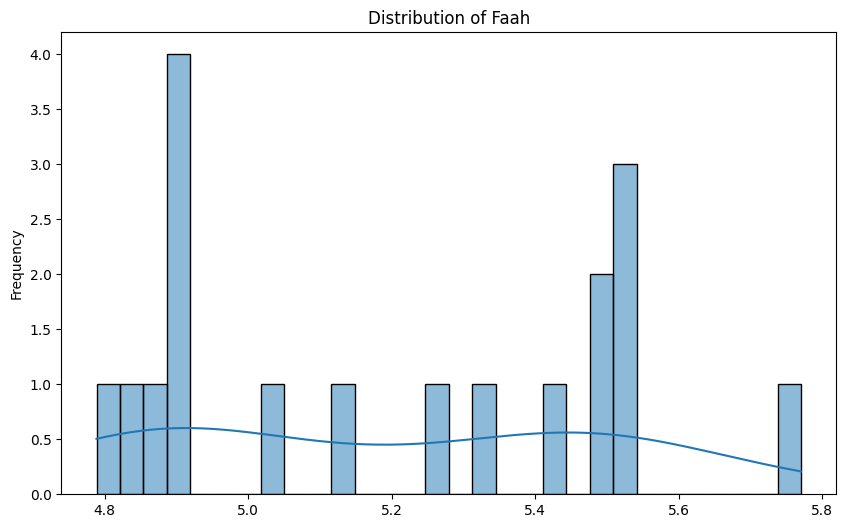

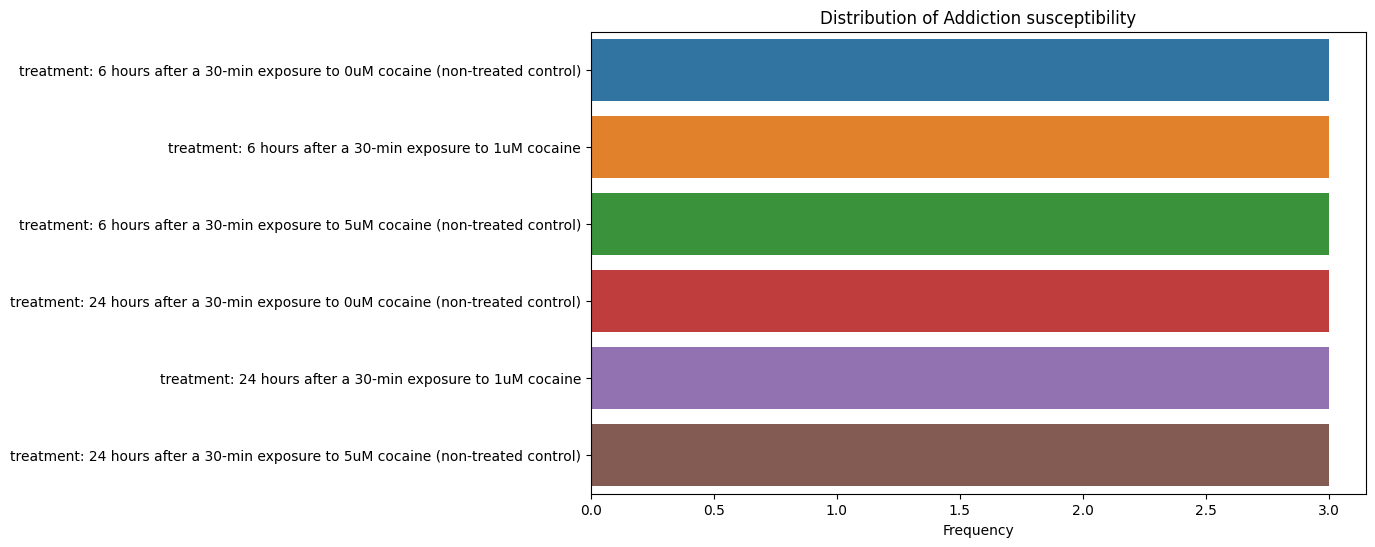

In [117]:
condition_feature_cols = condition_merged_data.columns.tolist()[:-1]
gene_list = [gene_regressors_for_condition[0]] # Only show one gene
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(condition_merged_data, numerical_columns=[ *gene_list], categorical_columns=[condition])

###Do Regression Over Gene Data for Condition

In [118]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized


In [119]:
from sklearn.linear_model import LogisticRegression

def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Instantiate LogisticRegression with L1 regularization
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

        # Fit the logistic regression model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        binary_predictions = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

data_array_condition = condition_merged_data[gene_regressors_for_condition].values

# Normalize data
X_condition = data_array_condition
# print(X_condition.shape)

y_condition = condition_merged_data[condition].values
# print(y_condition.shape)
print(cross_validation(X_condition, y_condition))


TypeError: ignored

In [ ]:
# Select relevant columns and convert to numpy array
print("Common gene regressors for condition and trait", gene_regressors_for_condition)
data_array_condition = condition_merged_data[gene_regressors_for_condition].values


# Normalize data
X_condition = data_array_condition
X_condition, _ = preprocess_data(X_condition)

y_condition = condition_merged_data[condition].values
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_condition, y_condition)

##Condition Prediction

In [ ]:
data_array_common_regressors = trait_merged_data[gene_regressors_for_condition].values.astype(float)
# print(data_array_common_regressors)

X_common_regressors = data_array_common_regressors
X_common_regressors, _ = preprocess_data(X_common_regressors)

predictions_condition = model.predict_proba(X_common_regressors)[:, 1]

#The Second Stage Regression Analysis

In [ ]:
trait_merged_data.insert(0, condition, predictions_condition)
trait_merged_data = trait_merged_data.drop(columns=gene_regressors_for_condition)
trait_merged_data

##  Preliminary Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
trait_feature_cols = trait_merged_data.columns.tolist()[:-1]
gene_list = [trait_feature_cols[1]] # [col for col in input_cols if gene in col.lower()]

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(trait_merged_data, numerical_columns=[condition,*gene_list], categorical_columns=[trait])

## Do Regression & Cross Validation Over Gene Data for Trait

In [ ]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection


# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)


# Select relevant columns and convert to numpy array
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
cv_mean, cv_std = cross_validation(X_trait, y_trait)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

In [ ]:
trait_merged_data

In [ ]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

#X_trait = trait_merged_data.values
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
X_trait, _ = preprocess_data(X_trait)

# Fit the model
var_select.fit(X_trait, y_trait)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

## Discussion

In [ ]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': trait_feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

In [ ]:
threshold = 0.4

# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")